### Evaluation of the different latent spaces obtained with the different models.
- PCA
- KPCA
- AE
- DAE

In [1]:
import Models
import numpy as np
import random as rn
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

rn.seed(1)
np.random.seed(1)
tf.random.set_seed(1)
tf.config.threading.set_inter_op_parallelism_threads(1)
tf.config.threading.set_intra_op_parallelism_threads(1)

# Load Data
X_renal_data = pd.read_csv('./x_exp_renal.csv', sep='\t') # Dataset has Donor ID as first column
y_renal_data = pd.read_csv('./y_renal.csv', sep=',') # Dataset has Donor ID on first column and Label on second column.

X_train_norm, X_train_swapped, X_test_norm, y_train, y_test, y_train_oh, y_test_oh = Models.prepare_datasets(X_renal_data.iloc[:,1:],y_renal_data["label"], test_size=0.2)

# X_train_norm is the training dataset, normalized, that we will use to fit PCA, KPCA and the AE. 
# X_train_swapped is the same dataset with "swap noise", that we will use to fit the DAE.

swapping: 65 rows.


C:\Users\Tomas\Anaconda3\envs\tensorflow_2\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\Desarrollo\Data Science\Jupyter Notebooks\Stage\oss-stage-2019\Singleomic Dataset\Models.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_swapped.iloc[to_swap_rows,col] = X_train.iloc[sample_rows,col].values


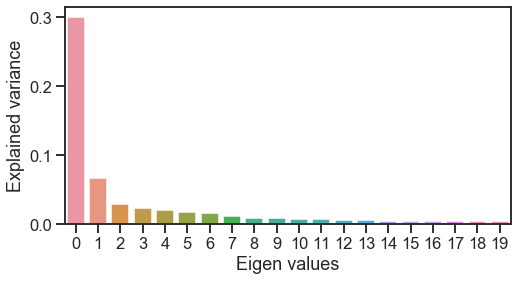

PCA on single-modal explained variance ratio: 0.5585163404717952


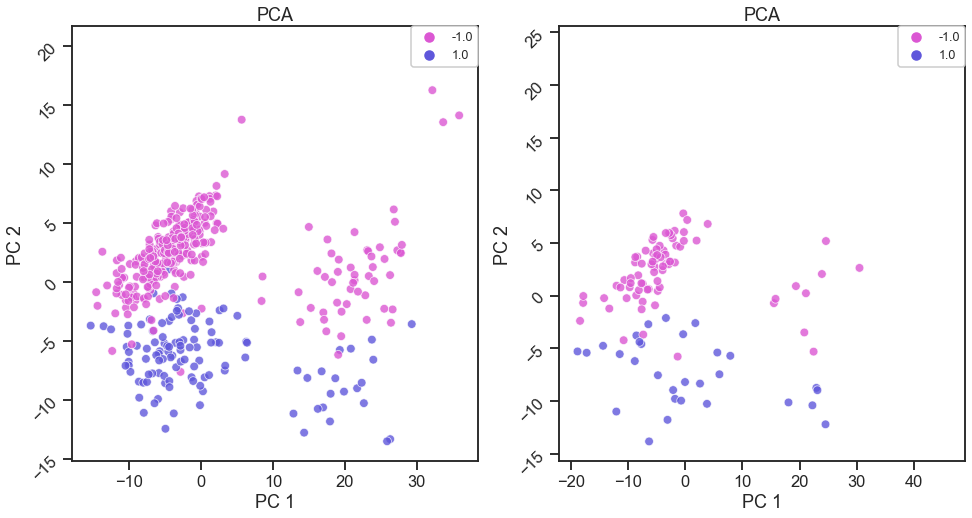

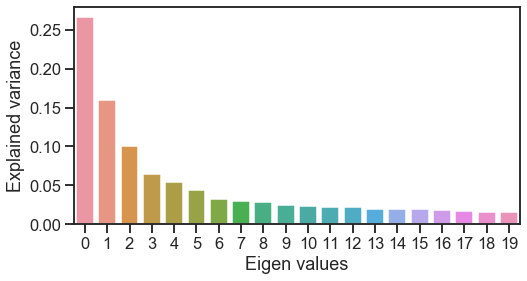

0.6894687682065617


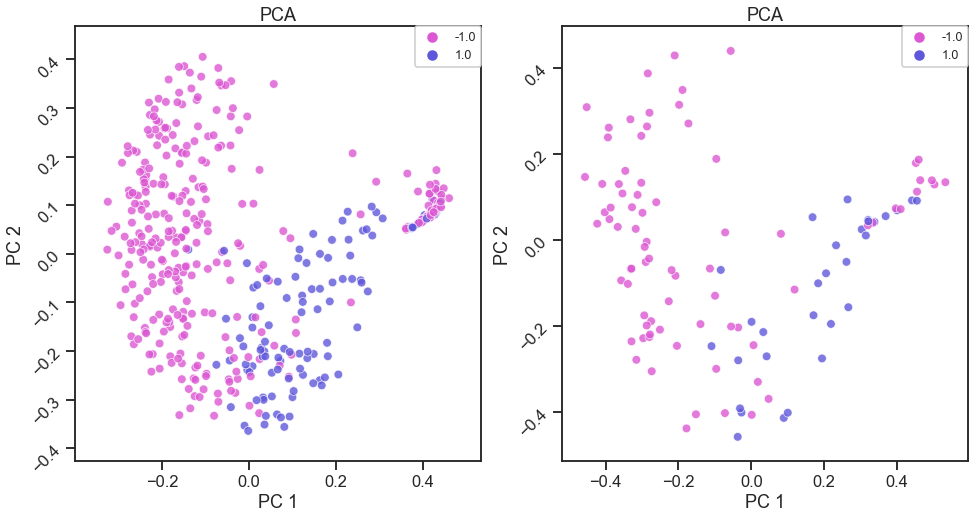

Compression: 1025.1
Train on 433 samples, validate on 109 samples
Epoch 1/100
433/433 [==============================] - 6s 13ms/sample - loss: 4.9116 - mse: 0.1491 - val_loss: 1.7369 - val_mse: 0.2283
Epoch 2/100
433/433 [==============================] - 4s 9ms/sample - loss: 1.4373 - mse: 0.1454 - val_loss: 1.0100 - val_mse: 0.2232
Epoch 3/100
433/433 [==============================] - 4s 10ms/sample - loss: 0.8195 - mse: 0.1395 - val_loss: 0.8038 - val_mse: 0.2168
Epoch 4/100
433/433 [==============================] - 4s 9ms/sample - loss: 0.6943 - mse: 0.1302 - val_loss: 0.7281 - val_mse: 0.2035
Epoch 5/100
433/433 [==============================] - 4s 9ms/sample - loss: 0.6183 - mse: 0.1147 - val_loss: 0.6760 - val_mse: 0.1812
Epoch 6/100
433/433 [==============================] - 4s 9ms/sample - loss: 0.5661 - mse: 0.0928 - val_loss: 0.6876 - val_mse: 0.1604
Epoch 7/100
433/433 [==============================] - 4s 10ms/sample - loss: 0.6192 - mse: 0.0685 - val_loss: 0.7285 - va

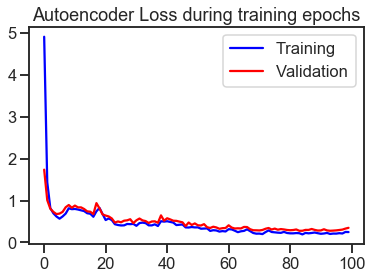

0.24637215039058316
Compression: 1025.1
Train on 433 samples, validate on 109 samples
Epoch 1/100
433/433 [==============================] - 7s 16ms/sample - loss: 4.9113 - mse: 0.1492 - val_loss: 1.7352 - val_mse: 0.2283
Epoch 2/100
433/433 [==============================] - 4s 9ms/sample - loss: 1.4368 - mse: 0.1458 - val_loss: 1.0076 - val_mse: 0.2238
Epoch 3/100
433/433 [==============================] - 4s 9ms/sample - loss: 0.8046 - mse: 0.1405 - val_loss: 0.7916 - val_mse: 0.2159
Epoch 4/100
433/433 [==============================] - 4s 9ms/sample - loss: 0.6762 - mse: 0.1307 - val_loss: 0.6877 - val_mse: 0.2009
Epoch 5/100
433/433 [==============================] - 4s 9ms/sample - loss: 0.5899 - mse: 0.1153 - val_loss: 0.6428 - val_mse: 0.1805
Epoch 6/100
433/433 [==============================] - 4s 9ms/sample - loss: 0.5813 - mse: 0.0934 - val_loss: 0.6542 - val_mse: 0.1562
Epoch 7/100
433/433 [==============================] - 4s 9ms/sample - loss: 0.6153 - mse: 0.0703 - val

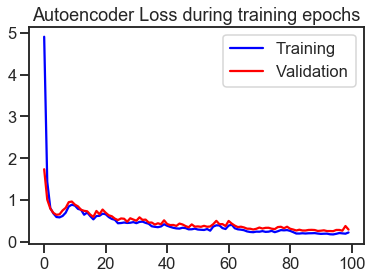

0.21906878986755088


In [6]:
## Perform PCA
X_latent_pca, X_latent_test_pca = Models.perform_PCA(X_train_norm, X_test_norm, y_train, y_test, n_components=20)
## Perform KPCA
X_latent_kpca, X_latent_test_kpca = Models.perform_KPCA(X_train_norm, X_test_norm, y_train, y_test, n_components=20, kernel="rbf", gamma=0.008)
## Build and Train Autoencoder
autoencoder, encoder, decoder = Models.build_and_train_autoencoder(X_train_norm,
                                                                  X_train_norm,
                                                                  X_test_norm,
                                                                  y_train, 
                                                                  y_test, 
                                                                  encoding_dim=20, 
                                                                  regularizer=tf.keras.regularizers.l1_l2(0.0001,0),
                                                                  dropout=0.5,
                                                                  epochs=100)

X_latent_ae = Models.encode_dataset(X_train_norm, encoder)
X_latent_test_ae = Models.encode_dataset(X_test_norm, encoder)
## Build and Train Denoising Autoencoder
d_autoencoder, d_encoder, d_decoder = Models.build_and_train_autoencoder(X_train_swapped,
                                                                         X_train_norm,
                                                                         X_test_norm,
                                                                         y_train, 
                                                                         y_test, 
                                                                         encoding_dim=20, 
                                                                         regularizer=tf.keras.regularizers.l1_l2(0.0001,0),
                                                                         dropout=0.5,
                                                                         epochs=100)
X_latent_dae = Models.encode_dataset(X_train_norm, d_encoder)
X_latent_test_dae = Models.encode_dataset(X_test_norm, d_encoder)

# Latent Representations:
# - PCA: X_latent_pca, X_latent_test_pca
# - KPCA: X_latent_kpca, X_latent_test_kpca
# - AE: X_latent_ae, X_latent_test_ae
# - DAE: X_latent_dae, X_latent_test_dae

In [7]:
### CLASSIFICATION ###
# We use the reduced datasets to train a classifier and compare them.

# PCA Classification
Models.classify(X_train_pca, X_test_pca, y_train_oh, y_test_oh, model_type="PCA")
# KPCA Classification
Models.classify(X_train_kpca, X_test_kpca, y_train_oh, y_test_oh, model_type="KPCA")
# AE Classification
Models.classify(X_train_ae, X_test_ae, y_train_oh, y_test_oh, model_type="AE")
# DAE Classification
Models.classify(X_train_dae, X_test_dae, y_train_oh, y_test_oh, model_type="DAE")



AttributeError: module 'Models' has no attribute 'classify'

In [ ]:
###### CLUSTERING ###

# PCA Clustering
Models.cluster(X_train_pca, n_clusters=2, model_type="PCA")
# KPCA Clustering
Models.cluster(X_train_kpca, n_clusters=2, model_type="KPCA")
# AE Clustering
Models.cluster(X_train_ae, n_clusters=2, model_type="AE")
# DAE Clustering
Models.cluster(X_train_dae, n_clusters=2, model_type="DAE")
